# Classification with an imbalanced Dataset

In this notebook I will implement a simple random forest classifier. However, the main focus of the notebook will be:

- **Preparing the data** correctly to feed it to the algorithm
- Explore three ways to solve the **imbalance problem** in the dataset in order to train a model that can classify both classes even if one of them is much less abundant in our data.

In [1]:
#importing data and data wrangling
from sklearn import datasets
import pandas as pd

#Linear Algebra
import numpy as np

#Statistics
import scipy as sp

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Downloading dataset from openml
data = datasets.fetch_openml(
    'bank-marketing',
    version = 'active',
    return_X_y = True,
    as_frame = True
)

X, y = data

In [4]:
#I provide the actual names of the columns to build a more comprehensive
# dataset and to know what we are looking at.
new_variables = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan','contact','day','month','duration','campaign','pdays', 'previous',
       'poutcome', 'y']

variables_dict={}
for index,old in enumerate(list(X.columns)):
    variables_dict[old] = new_variables[index]
    
#We rename the dataframe's columns
X = X.rename(columns = variables_dict)

In [5]:
#treating y and concatenating both X and y to form a dataframe
y = y.to_frame('y')

y = pd.DataFrame(y)
y = y.rename(columns = {'Class':'y'})

df = pd.concat([X,y], axis = 1)



In [6]:
df.head() #showing all the columns and few first rows of the dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,1
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,1
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,1
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,1
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,1


Now that I have my dataset, I want to check how much it affects the algorithm that the features are correctly engineered

**Importing all the necessary libraries**

In [7]:
#Importing the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [8]:
#Importing functions to split the dataset into train and test sets 
from sklearn.model_selection import train_test_split

#Importing the different metrics that will be usde to evaluate the model
from sklearn.metrics import accuracy_score, f1_score, recall_score

Lets just feed the data as it is to the Random Forest

In [9]:
#Spliting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.3,
                                                   random_state = 0,
                                                   stratify = y)

In [10]:
rfc = RandomForestClassifier()

**SPOILER** tried to fit the data with the classifier and it needs to have the strings converted to numbers.

AHÁ! We need to convert the strings to numbers.

## One-Hot Encoding

We will convert the string data to numbers to be able to feed it to the algorithm.

In [11]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [12]:
enc = OneHotEncoder(handle_unknown = 'ignore')

In [13]:
X_enc = enc.fit_transform(X).toarray()

In [14]:
pd.get_dummies(X, drop_first = True).head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58.0,2143.0,5.0,261.0,1.0,-1.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44.0,29.0,5.0,151.0,1.0,-1.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33.0,2.0,5.0,76.0,1.0,-1.0,0.0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,47.0,1506.0,5.0,92.0,1.0,-1.0,0.0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,33.0,1.0,5.0,198.0,1.0,-1.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [15]:
df_ohe = df.copy()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  float64 
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  float64 
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  float64 
 10  month      45211 non-null  category
 11  duration   45211 non-null  float64 
 12  campaign   45211 non-null  float64 
 13  pdays      45211 non-null  float64 
 14  previous   45211 non-null  float64 
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(10), float64(7)
memory usage: 2.8 MB


In [17]:
list_category = [df.columns.get_loc(c) for c in list(df.select_dtypes(include='category').columns)]

In [18]:
categories_to_transform = list(df.select_dtypes(include='category').columns)

In [19]:
categories_to_transform = categories_to_transform[:-1]
categories_to_transform

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [20]:
numerical_columns = list(df.select_dtypes(include='float64').columns)
numerical_columns

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [21]:
data_OHE = pd.concat([df[numerical_columns],
                    pd.get_dummies(df[categories_to_transform],
                                  drop_first = True), y],
                    axis = 1)

In [22]:
data_OHE.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y
0,58.0,2143.0,5.0,261.0,1.0,-1.0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
1,44.0,29.0,5.0,151.0,1.0,-1.0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
2,33.0,2.0,5.0,76.0,1.0,-1.0,0.0,0,1,0,...,0,0,1,0,0,0,0,0,1,1
3,47.0,1506.0,5.0,92.0,1.0,-1.0,0.0,1,0,0,...,0,0,1,0,0,0,0,0,1,1
4,33.0,1.0,5.0,198.0,1.0,-1.0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,1,1


In [23]:
X_train, X_test, y_train, y_test = train_test_split(data_OHE.drop('y', axis = 1), 
                                                    data_OHE['y'],
                                                   test_size = 0.3,
                                                   random_state = 0)

In [24]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
y_pred = rfc.predict(X_test)

In [26]:
accuracy_score(y_true = y_test, y_pred = y_pred)

0.9015777056915364

SO FAR SO... GOOD?

Lets check something out really quick

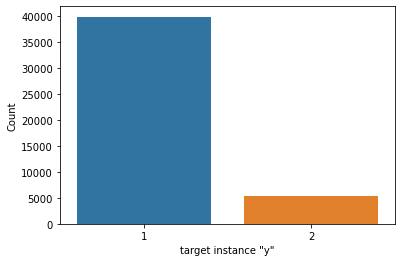

In [27]:
b = sns.countplot(df['y'])
b.set_xlabel('target instance "y"')
b.set_ylabel('Count')
plt.show()

Clearly, this is an imbalanced dataset.

Be weary of accuracy score when you have an imbalanced dataset such as this one, since most of this accuracy might come from the majority class being classified correctly, which is not saying much for the algorithm.

To solve this, lets use other metric scores that will focuse on how well the algorithm classifies the minority class: 

- f1_score
- recall_score

In [28]:
f1_score(y_test, y_pred, pos_label = '2')

0.48195576251455186

In [29]:
recall_score(y_test, y_pred, pos_label = '2')

0.38934169278996866

Okay, this classification task is far from done.

Lets check one more thing: the Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
print(confusion_matrix(y_test, y_pred))

[[11608   361]
 [  974   621]]


In [32]:
confmat = confusion_matrix(y_test, y_pred)

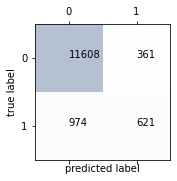

In [33]:
#Plotting a fancier confusion matrix
fig, ax = plt.subplots(figsize = (2.5, 2.5))
ax.matshow(confmat, cmap = plt.cm.Blues, alpha = 0.3)

for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x = j, y = i,
               s = confmat[i,j])
        
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

We see that 959 values are misclassified for the minority class.

In [34]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.model_selection import StratifiedKFold

In [35]:
cv = list(StratifiedKFold(n_splits = 3).split(X_train, y_train))

# Techniques to implement

- Downsize the majority class
- Upsample the minority class
- Generate synthetic samples of both classes

Each of the numbered approaches will follow the same structure:

- Prepare the data (upsampling/downsizing/generating more instances of both classes)
- Fit the Random Forest
- Calculate different metrics to evaluate the algorithm's performance
    - Accuracy
    - Recall 
    - f1 score
- Pass those accuracies to a dictionary in order to generate a graph which to infer information from.

# Downsizing the majority class

In [36]:
#initialize dictionary to plot the different scores in the conclusion
conclusion = {}

In [37]:
#Select the data that corresponeds to each class in order to increase/reduce it
minority = data_OHE[data_OHE['y'] == '2']
majority = data_OHE[data_OHE['y'] == '1']

In [38]:
from sklearn.utils import resample

In [39]:
#Downsize majority
majority_down = resample(majority,
                        replace = False,
                        n_samples = len(minority),
                        random_state = 27)

downsampled = pd.concat([majority_down, minority])

#Check the number of samples
downsampled.y.value_counts()

2    5289
1    5289
Name: y, dtype: int64

In [40]:
#It is important to assign the training and testing sets after generating the data with the upsampled/downsized
# minority/majority

X_train, X_test, y_train, y_test = train_test_split(downsampled.drop('y', axis =1),
                                                    downsampled['y'],
                                                    test_size=0.3,
                                                    random_state = 27)

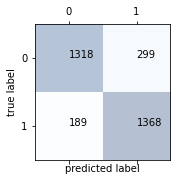

In [41]:
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

confmat = confusion_matrix(y_true = y_test, y_pred = y_pred)

#Plotting a fancier confusion matrix
fig, ax = plt.subplots(figsize = (2.5, 2.5))
ax.matshow(confmat, cmap = plt.cm.Blues, alpha = 0.3)

for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x = j, y = i,
               s = confmat[i,j])
        
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

Things have improved  A LOT.

In [42]:
# dictionary to add to the conclusion dictionary
downsizing = {}

In [43]:
#f1 score
f1_down = f1_score(y_test, y_pred, pos_label = '2')

downsizing['f1_score'] = f1_down

print(f1_down)

0.84863523573201


In [44]:
#Recall score
recall_down = recall_score(y_test, y_pred, pos_label = '2')

downsizing['recall_score'] = recall_down

print(recall_down)

0.8786127167630058


In [45]:
#Accuracy score
accuracy_down = accuracy_score(y_test, y_pred)

downsizing['accuracy'] = accuracy_down

In [46]:
conclusion['Downsizing_majority']= downsizing

NICE.

The following code will plot the evolution of the validation accuracy in front of the training samples.

In [47]:
from sklearn.model_selection import learning_curve

In [48]:
train_sizes, train_scores, test_scores = learning_curve(estimator = rfc,
                                                       X = X_train,
                                                       y = y_train,
                                                       train_sizes = np.linspace(0.1, 1.0, 10),
                                                       cv = 10,
                                                       n_jobs = 1)

In [49]:
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

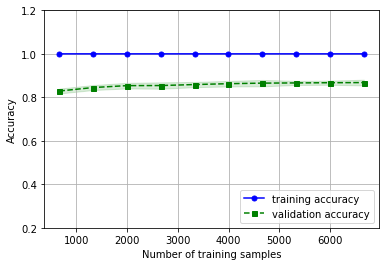

In [50]:
plt.plot(train_sizes, train_mean,
        color = 'blue', marker = 'o',
        markersize = 5, label = 'training accuracy')

plt.fill_between(train_sizes,
                train_mean+train_std,
                train_mean-train_std,
                alpha = 0.15, color = 'blue')

plt.plot(train_sizes, test_mean,
        color = 'green', linestyle = '--',
        marker = 's', markersize = 5,
        label = 'validation accuracy')

plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean -test_std,
                alpha = 0.15, color = 'green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.ylim([0.2, 1.2])
plt.show()

# Upsampling the minority class

In [51]:
#Assign again
minority = data_OHE[data_OHE['y']=='2']
majority = data_OHE[data_OHE['y']=='1']

In [52]:
#Increase the number of minority samples
minority_up = resample(minority,
                        replace = True,
                        n_samples = len(majority),
                        random_state = 27)

upsampled = pd.concat([majority, minority_up])

#Check the number of samples
upsampled.y.value_counts()

2    39922
1    39922
Name: y, dtype: int64

In [53]:
#It is important to assign the training and testing sets after generating the data with the upsampled/downsized
# minority/majority

X_train, X_test, y_train, y_test = train_test_split(upsampled.drop('y', axis = 1), 
                                                    upsampled['y'],
                                                   test_size = 0.3,
                                                   random_state = 0)

In [54]:
#Train the Random Forest
rfc.fit(X_train, y_train)

y_pred_up = rfc.predict(X_test)

In [55]:
#Define the confusion matrix
confmat2 = confusion_matrix(y_true = y_test, y_pred = y_pred_up)

In [56]:
confmat2

array([[10973,   785],
       [   31, 12165]], dtype=int64)

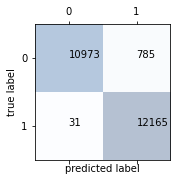

In [57]:
#Plotting a fancier confusion matrix
fig, ax = plt.subplots(figsize = (2.5, 2.5))
ax.matshow(confmat2, cmap = plt.cm.Blues, alpha = 0.3)

for i in range(confmat2.shape[0]):
    for j in range(confmat2.shape[1]):
        ax.text(x = j, y = i,
               s = confmat2[i,j])
        
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [58]:
#Dictionary to add to the conclusion dictionary
upsizing = {}

In [59]:
#f1 score
f1_up = f1_score(y_test, y_pred_up, pos_label = '2')

upsizing['f1_score'] = f1_up

print(f1_up)

0.9675495108565975


In [60]:
#Recall score
recall_up = recall_score(y_test, y_pred_up, pos_label = '2')

upsizing['recall_score'] = recall_up

print(recall_up)

0.9974581830108232


In [61]:
#Accuracy Score
up_accuracy = accuracy_score(y_test, y_pred_up)

upsizing['accuracy'] = up_accuracy

In [62]:
conclusion['Upsizing'] = upsizing

By upsampling the minority class and training, our scores are much better.

## Generating synthetic samples (SMOTE)

Via the SMOTE (Synthetic Minority Oversampling Technique)library

In [63]:
#Importing imblearn library, to deal with this issue
from imblearn.over_sampling import SMOTE

In [64]:
#Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_OHE.drop('y', axis =1),
                                                    data_OHE['y']
                                                    , test_size=0.3,
                                                    random_state = 27)

In [65]:
#We implement the SMOTE function
sm = SMOTE(random_state = 27)

In [66]:
#fit the fit_sample function to the training sets to increase their size
X_train, y_train = sm.fit_sample(X_train, y_train)

In [67]:
#fit the random forest classifier to the new training sets
smote = rfc.fit(X_train, y_train)

In [68]:
#Make the predictions
smote_pred = smote.predict(X_test)

In [69]:
#Dictionary to add to the conclusion dictionary

synthetic_samples = {}

In [70]:
#Accuracy Score
synth_acc = accuracy_score(y_test, smote_pred)

synthetic_samples['accuracy'] = synth_acc

print(synth_acc)

0.901061633736361


In [71]:
#Recall Score
synth_recall = recall_score(y_test, smote_pred, pos_label = '2')

synthetic_samples['recall_score'] = synth_recall

print(synth_recall)

0.48921319796954316


In [72]:
#f1 Score
synth_f1 = f1_score(y_test, smote_pred, pos_label = '2')

synthetic_samples['f1_score'] = synth_f1

print(synth_f1)

0.5346740638002775


In [73]:
conclusion['Synthetic samples'] = synthetic_samples

In [74]:
#Define the confusion Matrix
confmat3 = confusion_matrix(y_true = y_test, y_pred = smote_pred)

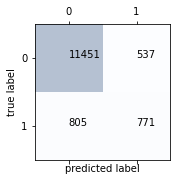

In [75]:
#Plotting a fancier confusion matrix
fig, ax = plt.subplots(figsize = (2.5, 2.5))
ax.matshow(confmat3, cmap = plt.cm.Blues, alpha = 0.3)

for i in range(confmat2.shape[0]):
    for j in range(confmat3.shape[1]):
        ax.text(x = j, y = i,
               s = confmat3[i,j])
        
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

The generation of synthetic samples does not provide results as good as it does downsizing and upsampling.

#  Conclusion

Since one image is worth a thousand words, lets build a small dataframe from the *conclusion* dictionary that we've been building through the notebook.

In [76]:
df_conclusion = pd.DataFrame(conclusion).transpose()

df_conclusion

,f1_score,recall_score,accuracy
Downsizing_majority,0.848635,0.878613,0.846251
Upsizing,0.967550,0.997458,0.965935
Synthetic samples,0.534674,0.489213,0.901062


Now, a simple bar plot should suffice 

<AxesSubplot:>

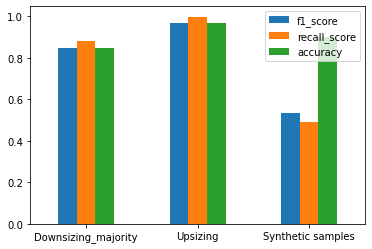

In [77]:
df_conclusion.plot(kind = 'bar', rot = 0)


From the techniques implemented in this notebook, both downsizing the majority class and upsizing the minority class have produced the better results, being the latter the one to produce the best results.

If this was a real project, we would go with the model trained in an upsized dataset. However, there is no fixed method to solve an imbalanced dataset, so we should always try several approaches and stay with the one that producs better results for our current dataset, as has been done here.